<a href="https://colab.research.google.com/github/mobley-trent/INTERNSAVY/blob/main/graduate_admission_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION

This dataset contains data about students seeking post-graduate study opportunities. It has various features such as test scores, their University rating and the strength of their Letter of Recommendation / Statement of Purpose. The goal of this project is to find the relationship between the features and the chances of being admitted to a post-graduate programme.

# DATA

We make use of the Kaggle API to pull in the data into Google Colab:

In [ ]:
from google.colab import files
files.upload() #upload kaggle.json

!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

!kaggle datasets download -d mohansacharya/graduate-admissions

Saving kaggle.json to kaggle.json
kaggle.json
  0% 0.00/9.64k [00:00<?, ?B/s]
100% 9.64k/9.64k [00:00<00:00, 21.9MB/s]


In [ ]:
!unzip /content/graduate-admissions.zip

Archive:  graduate-admissions.zip
  inflating: Admission_Predict.csv   
  inflating: Admission_Predict_Ver1.1.csv  


In [ ]:
# Prerequisite libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/Admission_Predict_Ver1.1.csv")

In [ ]:
# Import data locally

# df = pd.read_csv("data/Admission_Predict_Ver1.1.csv")

## EDA

We take a look at a few instances of the data as well as some descriptive statistics.

In [ ]:
df.sample(n=10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
464,465,298,97,2,2.0,3.0,7.21,0,0.45
404,405,311,101,3,2.0,2.5,7.64,1,0.62
463,464,304,107,3,3.5,3.0,7.86,0,0.57
492,493,298,101,4,2.5,4.5,7.69,1,0.53
351,352,325,110,4,3.5,4.0,8.67,1,0.73
95,96,304,100,4,1.5,2.5,7.84,0,0.42
381,382,319,105,3,3.0,3.5,8.67,1,0.73
456,457,299,100,2,2.0,2.0,7.88,0,0.51
113,114,320,110,2,4.0,3.5,8.56,0,0.72
444,445,324,113,5,4.0,5.0,9.25,1,0.92


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
# Check for null values

print(df.isna().sum())

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [ ]:
# Drop the redundant "Serial No." feature

df = df.drop("Serial No.", axis=1)

In [ ]:
# Removing spaces from column names

df.columns = df.columns.str.replace(" ","")

This dataset is small so there is no need to prune outliers. This might lead to loss of information.

## CORRELATIONS

We create a pairplot to visualize the correlation of the features amongst themselves as well as their own distributions. This enables us to get a high level understanding of the whole dataset.

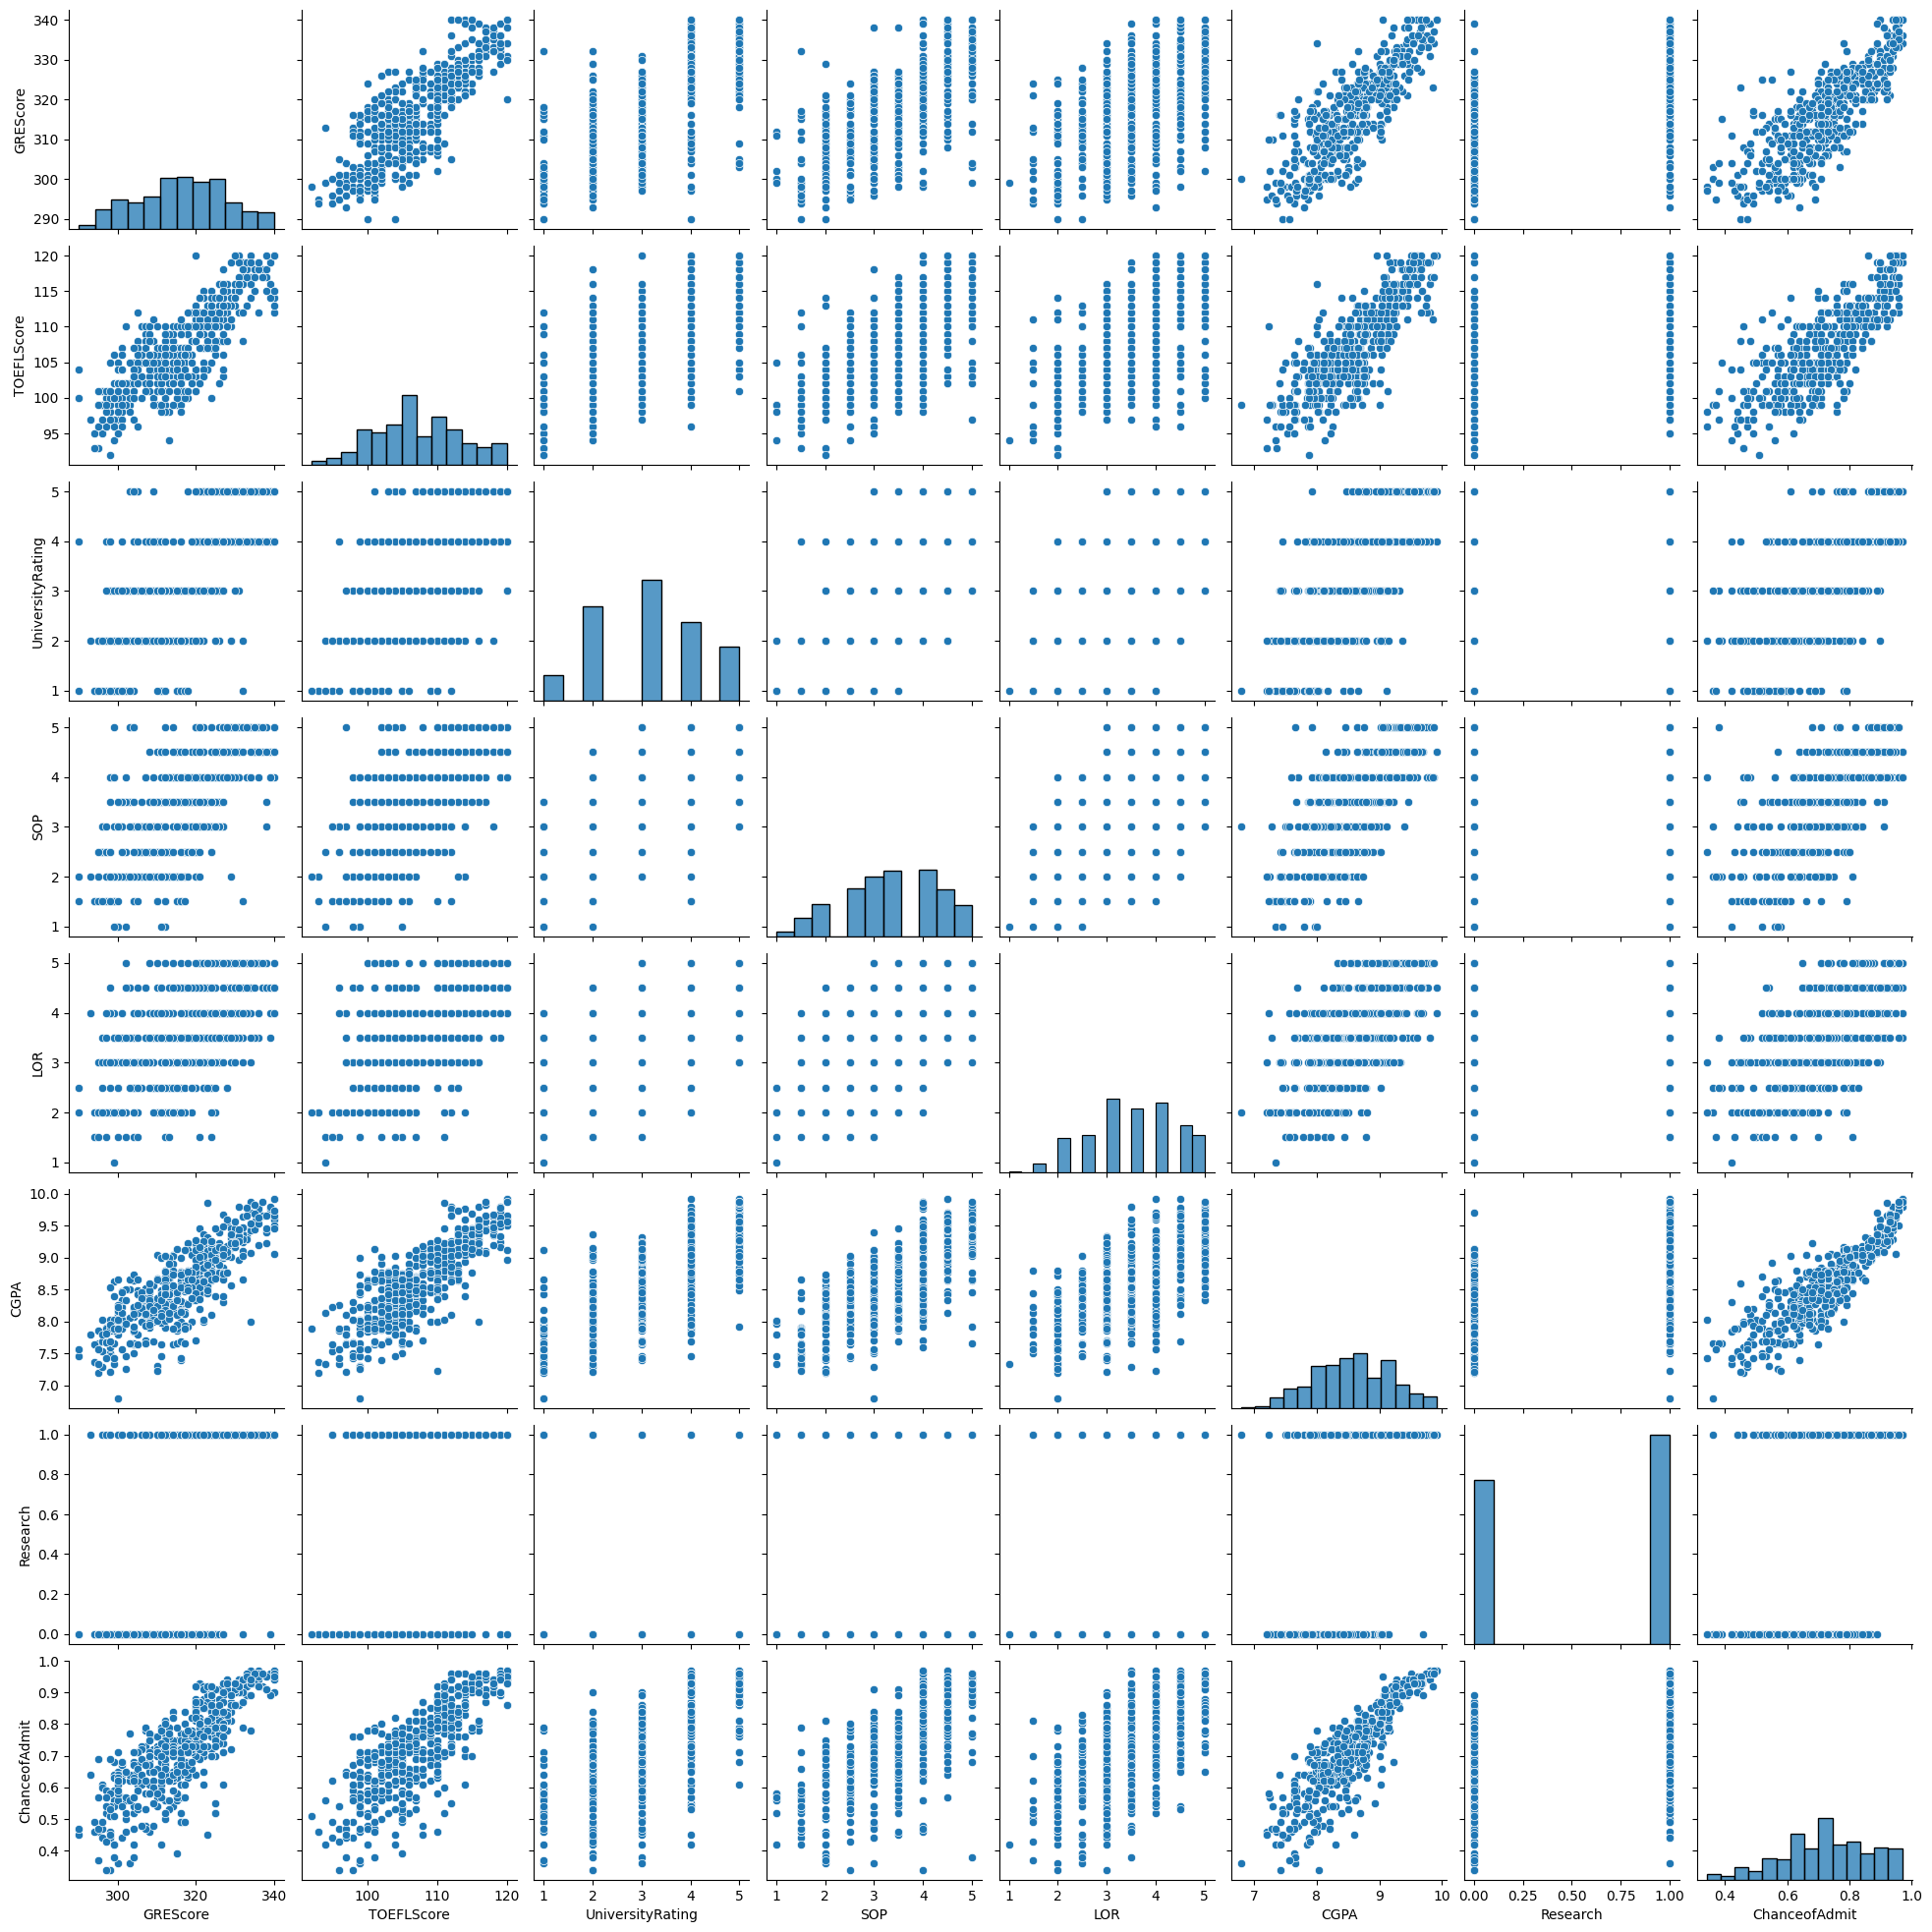

In [ ]:
sns.pairplot(df, palette="paired")

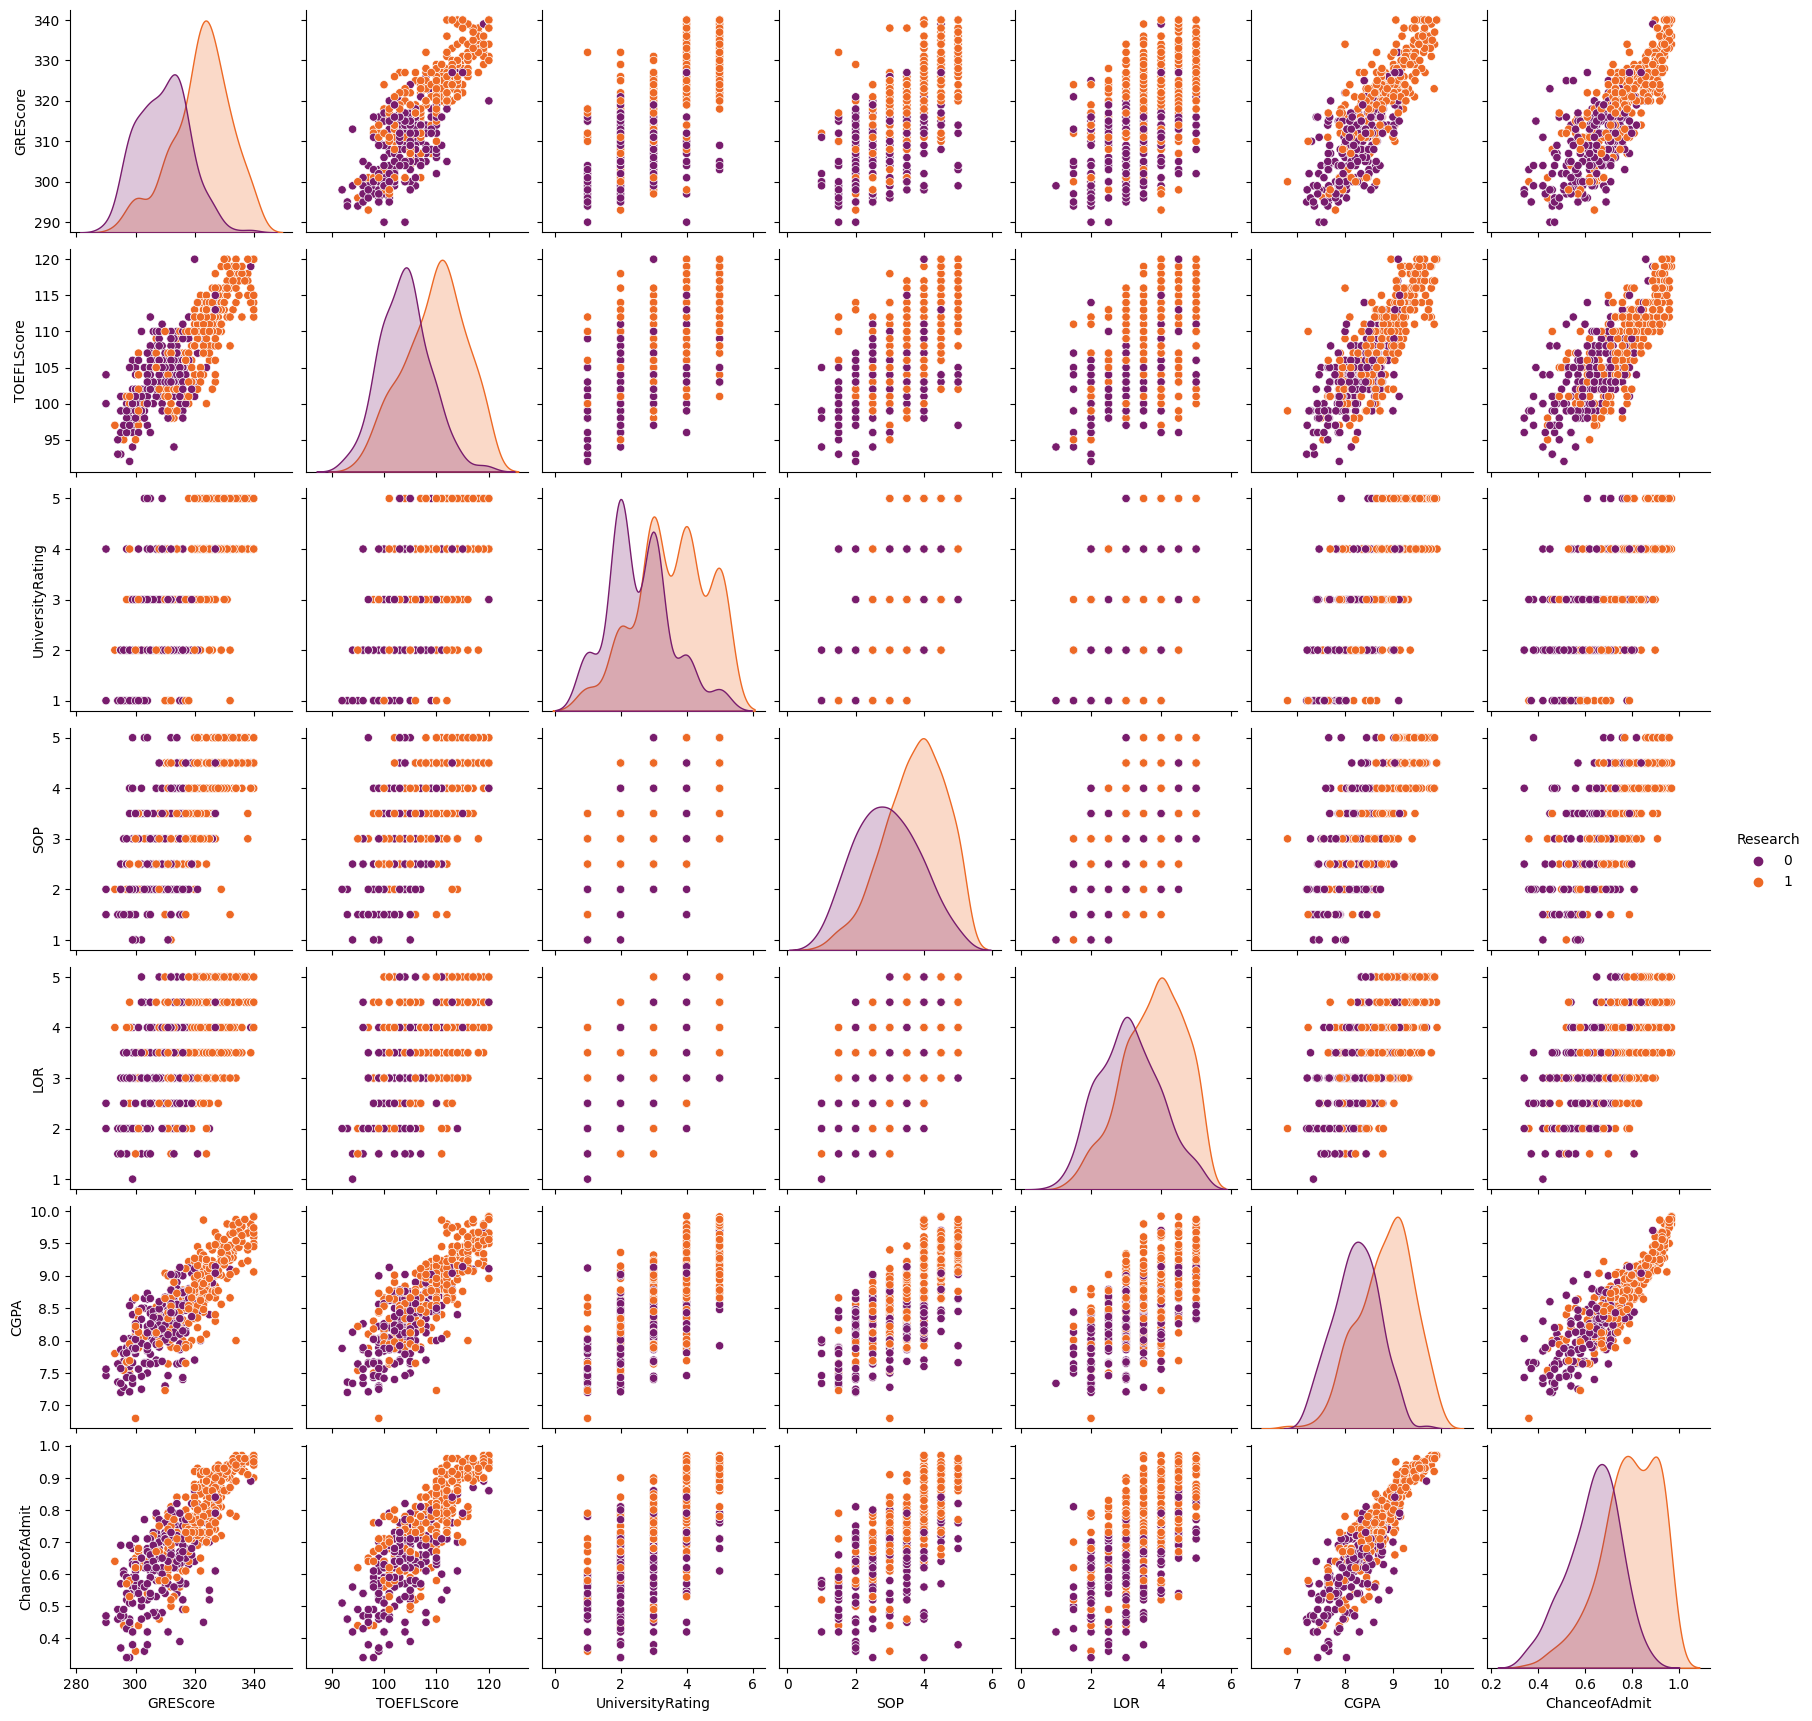

In [ ]:
sns.pairplot(df, hue="Research", palette="inferno")

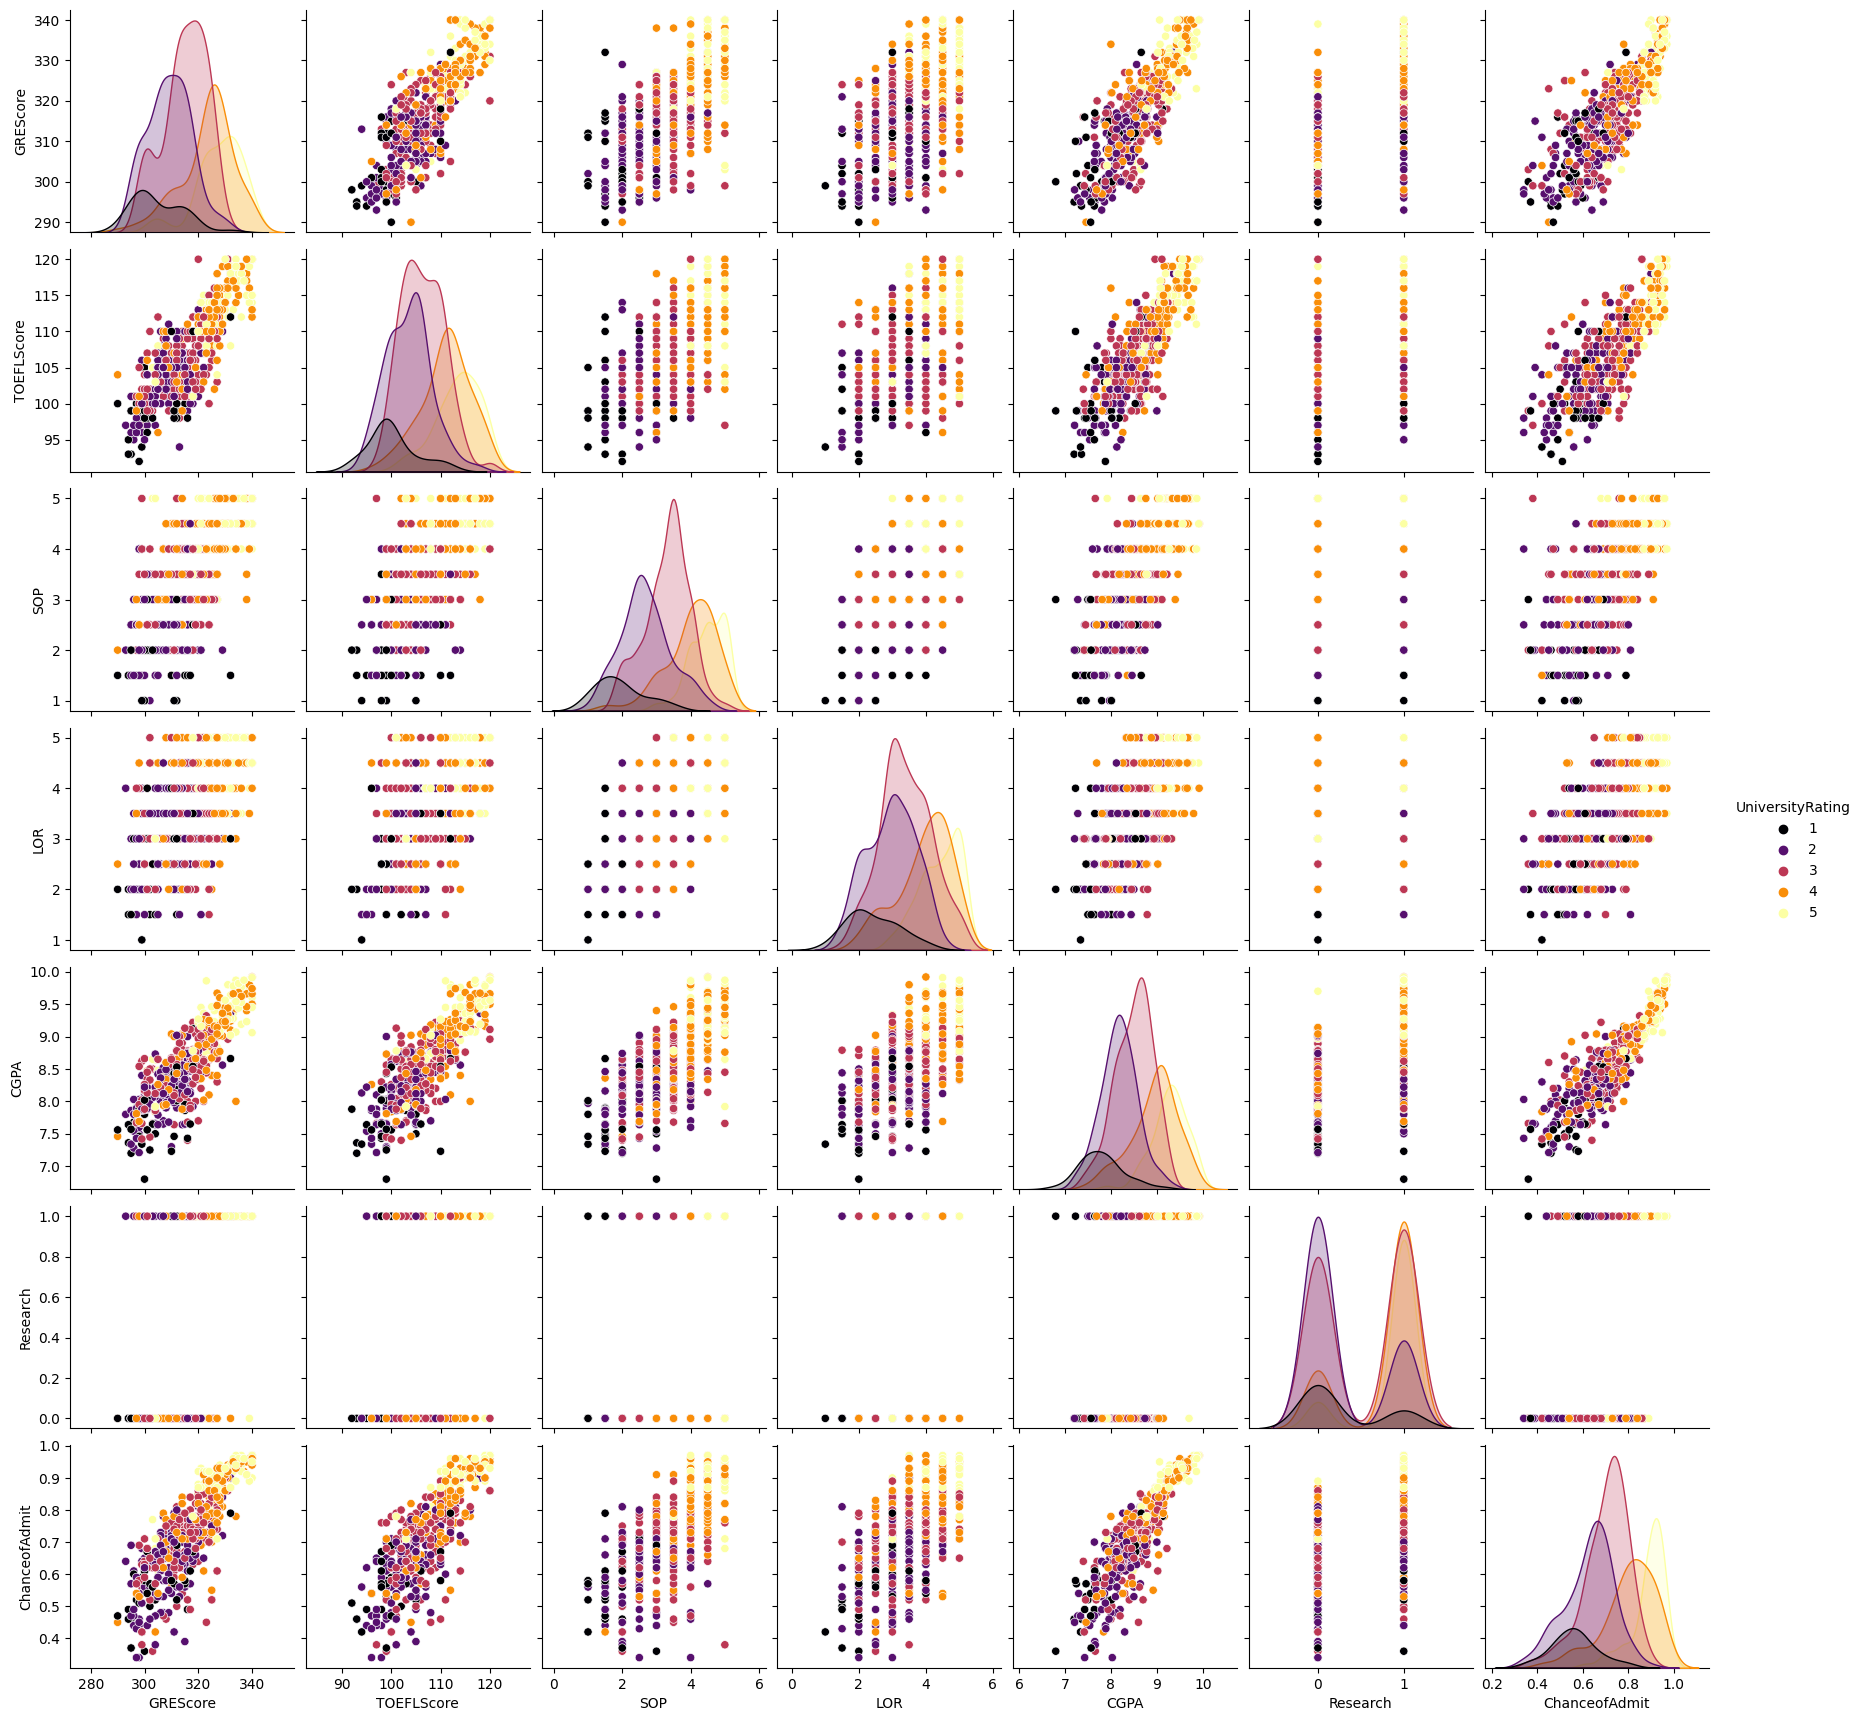

In [ ]:
sns.pairplot(df, hue="UniversityRating", palette="inferno")

There is a clear relationship between most of the features and the target variable.

A heatmap is also useful in this situation.

<Axes: >

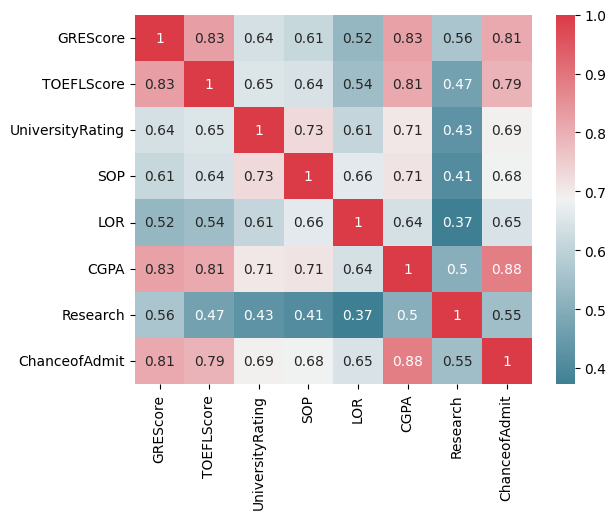

In [ ]:
corr = df.corr()
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=colormap)

Here we see that according to the data, `GRE Score`, `TOEFL Score` and `CGPA` have the highest correlation to the target variable: `Chance of Admit`

Let's perform some hypothesis testing to verify these claims

## HYPOTHESIS TESTING

We use the *Chi-Square Test of Independence* to determine whether certain features are correlated to the target feature.

- Null hypothesis(h0): The two features have not relationship.
- Alternative hypothesis(h1): There is a relationship between the two categorical variables.

In [ ]:
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from scipy.stats import chi2

We create a new column called `AdmissionCategories` to group data points according to different ranges of the `Chance of Admit`

In [ ]:
data = df.copy()
data['AdmissionCategories'] = 0
data.loc[(data['ChanceofAdmit'] >= 0) & (data['ChanceofAdmit'] <= 0.35), 'AdmissionCategories'] = 'Low'
data.loc[(data['ChanceofAdmit'] > 0.35) & (data['ChanceofAdmit'] <= 0.7), 'AdmissionCategories'] = 'Medium'
data.loc[(data['ChanceofAdmit'] > 0.7), 'AdmissionCategories'] = 'High'
data.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit,AdmissionCategories
0,337,118,4,4.5,4.5,9.65,1,0.92,High
1,324,107,4,4.0,4.5,8.87,1,0.76,High
2,316,104,3,3.0,3.5,8.00,1,0.72,High
3,322,110,3,3.5,2.5,8.67,1,0.80,High
4,314,103,2,2.0,3.0,8.21,0,0.65,Medium


### GRE Score vs Chance of Admit

- h0: GRE Score and AdmissionCategories are independent.
- h1: GRE Score and AdmissionCategories are dependent.

Text(0.5, 1.0, 'GREScore Vs AdmissionCategories')

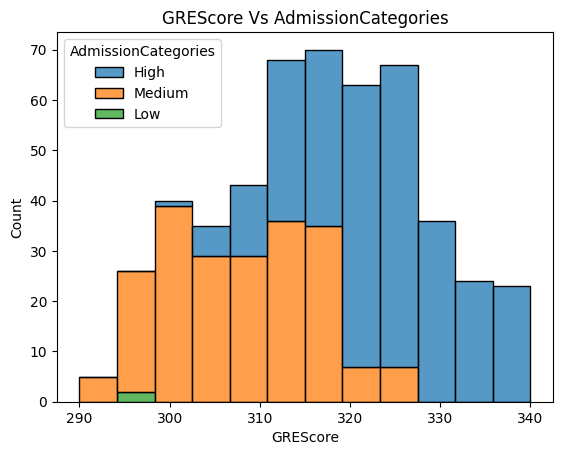

In [ ]:
sns.histplot(data=data, x="GREScore", hue="AdmissionCategories", multiple="stack")
plt.title("GREScore Vs AdmissionCategories")

In [ ]:
# Create a table of cross-tabulations

Admission_Gre = pd.crosstab(data["AdmissionCategories"],data["GREScore"])
print(Admission_Gre)

GREScore             290  293  294  295  296  297  298  299  300  301  ...  \
AdmissionCategories                                                    ...   
High                   0    0    0    0    0    0    0    0    1    0  ...   
Low                    0    0    0    0    0    1    1    0    0    0  ...   
Medium                 2    1    2    5    5    5    9   10   11   11  ...   

GREScore             331  332  333  334  335  336  337  338  339  340  
AdmissionCategories                                                    
High                   9    8    4    8    4    5    2    4    3    9  
Low                    0    0    0    0    0    0    0    0    0    0  
Medium                 0    0    0    0    0    0    0    0    0    0  

[3 rows x 49 columns]


In [ ]:
stat, p, dof, expected = chi2_contingency(Admission_Gre)
print('Degress of freedom = %d' % dof)
print('Expected frequencies ', expected)

Degress of freedom = 96
Expected frequencies  [[1.1480e+00 5.7400e-01 1.1480e+00 2.8700e+00 2.8700e+00 3.4440e+00
  5.7400e+00 5.7400e+00 6.8880e+00 6.3140e+00 4.0180e+00 2.8700e+00
  6.8880e+00 6.3140e+00 4.0180e+00 5.7400e+00 7.4620e+00 5.1660e+00
  6.3140e+00 9.1840e+00 1.3776e+01 6.8880e+00 9.1840e+00 7.4620e+00
  1.0332e+01 8.6100e+00 6.8880e+00 6.8880e+00 9.1840e+00 9.7580e+00
  9.7580e+00 7.4620e+00 1.3202e+01 8.6100e+00 6.8880e+00 9.7580e+00
  5.1660e+00 5.7400e+00 4.5920e+00 5.1660e+00 4.5920e+00 2.2960e+00
  4.5920e+00 2.2960e+00 2.8700e+00 1.1480e+00 2.2960e+00 1.7220e+00
  5.1660e+00]
 [8.0000e-03 4.0000e-03 8.0000e-03 2.0000e-02 2.0000e-02 2.4000e-02
  4.0000e-02 4.0000e-02 4.8000e-02 4.4000e-02 2.8000e-02 2.0000e-02
  4.8000e-02 4.4000e-02 2.8000e-02 4.0000e-02 5.2000e-02 3.6000e-02
  4.4000e-02 6.4000e-02 9.6000e-02 4.8000e-02 6.4000e-02 5.2000e-02
  7.2000e-02 6.0000e-02 4.8000e-02 4.8000e-02 6.4000e-02 6.8000e-02
  6.8000e-02 5.2000e-02 9.2000e-02 6.0000e-02 4.8000e-02

In [ ]:
prob = 0.95
critical = chi2.ppf(0.95, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

probability=0.950, critical=119.871, stat=318.492


In [ ]:
if abs(stat) >= critical:
    print('The variables are dependent (We reject H0)')
else:
    print('The variables are independent (We fail to reject H0)')

The variables are dependent (We reject H0)


In [ ]:
# interpret p-value
alpha = 1.0 - prob
print('Significance = %.3f, p = %.6f' % (alpha, p))
if p <= alpha:
    print('The variables are dependent (We reject H0)')
else:
    print('The variables are independent (We fail to reject H0)')

Significance = 0.050, p = 0.000000
The variables are dependent (We reject H0)


# PREPROCESSING

In [ ]:
# Splitting the data into features and the target

data = df.copy()
X = data.drop("ChanceofAdmit", axis=1)
y = data["ChanceofAdmit"]

In [ ]:
# Normalizing the data to fit all values into a standard range -> (0,1)

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

minmax = MinMaxScaler()
X_norm = minmax.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_norm,y,test_size=0.20,random_state=101)

# MODELLING

We will create several shallow ML models as baselines and see which model performs well on the data.

In [ ]:
!pip install catboost --quiet

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.5 MB/s eta 0:00:00


In [ ]:
models = [['DecisionTree :',DecisionTreeRegressor()],
           ['Linear Regression :', LinearRegression()],
           ['RandomForest :',RandomForestRegressor()],
           ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
           ['SVM :', SVR()],
           ['AdaBoostClassifier :', AdaBoostRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()],
           ['Xgboost: ', XGBRegressor()],
           ['CatBoost: ', CatBoostRegressor(logging_level='Silent')],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['BayesianRidge: ', BayesianRidge()],
           ['ElasticNet: ', ElasticNet()],
           ['HuberRegressor: ', HuberRegressor()]]


reg_pred=[]
print("Results...")

for name,model in models:
    model = model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rms=np.sqrt(mean_squared_error(y_test, predictions))
    reg_pred.append(rms)
    print(name, rms)

Results...
DecisionTree : 0.08796590248499699
Linear Regression : 0.061366057874807
RandomForest : 0.06936448514910205
KNeighbours : 0.0793882862896032
SVM : 0.07290481383128183
AdaBoostClassifier : 0.07186552329801058
GradientBoostingClassifier:  0.06750107694697233
Xgboost:  0.07708516405347612
CatBoost:  0.06502196468287576
Lasso:  0.1311519943615041
Ridge:  0.061587539309569284
BayesianRidge:  0.061375609457050145
ElasticNet:  0.1311519943615041
HuberRegressor:  0.06104384389063168


<Axes: xlabel='RMSE'>

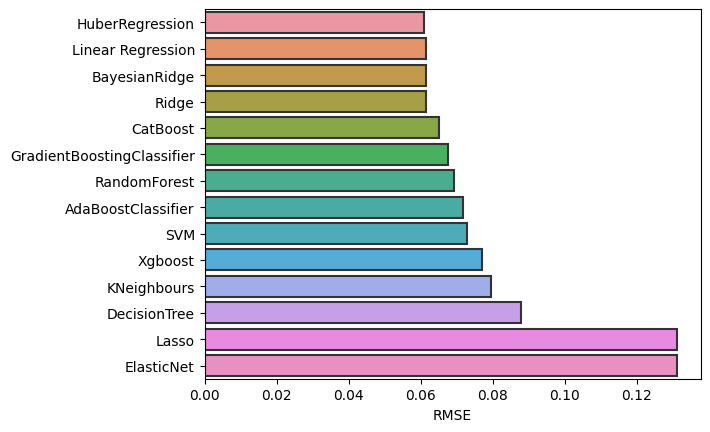

In [ ]:
y_ax = [
    "DecisionTree", "Linear Regression",
    "RandomForest", "KNeighbours",
    "SVM", "AdaBoostClassifier", "GradientBoostingClassifier",
    "Xgboost", "CatBoost", "Lasso", "Ridge",
    "BayesianRidge", "ElasticNet", "HuberRegression",
]

x_ax = reg_pred

error_dict = dict(zip(y_ax, x_ax))
errors = pd.DataFrame.from_dict(error_dict, orient='index', columns=['RMSE'])
order = errors['RMSE'].sort_values(ascending=True).index
sns.barplot(x=errors['RMSE'], y=errors.index, order=order, linewidth=1.5, edgecolor="0.2")

The `HuberRegression` algorithm records the lowest RMSE out of all the regression algorithms. The algorithm is robust i.e immune to outliers, so it made a good fit for this dataset.

REFERENCES:
- https://www.kaggle.com/code/nitindatta/graduate-admission-chances
- https://www.kaggle.com/code/sonalisingh1411/hypothesis-testing-eda-model-creation-insights
- https://www.kaggle.com/code/nilanml/how-to-get-into-graduate-school